# Setup

In [1]:
from __future__ import print_function
from __future__ import unicode_literals
from __future__ import division

In [33]:
import numpy as np
import pandas as pd

%pylab inline
import matplotlib.pyplot as plt
from numpy import genfromtxt

Populating the interactive namespace from numpy and matplotlib


In [3]:
import tensorflow as tf

In [6]:
tf.__version__

'1.1.0'

In [24]:
sess = tf.InteractiveSession()

In [5]:
keras = tf.contrib.keras

# Basic

In [2]:
a = tf.constant(1.0)
b = tf.constant(2.0)
c = tf.add(a, b)

In [4]:
with tf.Session() as sess:
    print(c.eval())

3.0


# Matrix

In [13]:
tf.reset_default_graph()

a = tf.ones((2, 2), dtype=tf.float32)
b = tf.Variable(tf.zeros((2, 2)), dtype=tf.float32, name="weights")
c = a + b

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    print(c.eval())

[[ 1.  1.]
 [ 1.  1.]]


# Placeholder

In [19]:
tf.reset_default_graph()

a = tf.placeholder("float")
b = tf.placeholder("float")
c = tf.get_variable('myvar', shape=(1), initializer=tf.constant_initializer(5))

y = tf.multiply(a, tf.log(b)) + c

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    print(c.eval())
    y_ = sess.run(y, feed_dict={a: 2.2, b: 5.6})
    print(y_)

[ 5.]
[ 8.79008675]


In [25]:
tf.random_normal((2, 3)).eval()

array([[ 0.65500534,  0.05530322, -0.50644666],
       [-0.85154182,  0.67327553,  1.45681202]], dtype=float32)

In [29]:
tf.log([10.]).eval()

array([ 2.30258512], dtype=float32)

In [28]:
tf.multinomial(tf.log([[10., 10.]]), 3).eval()

array([[1, 1, 0]])

# Exercise 1

In [33]:
my_random = tf.random_normal(shape=[10, 100], stddev=10, mean=0)

In [35]:
tf.reduce_mean(my_random, axis=1).eval()

array([-0.71970004,  1.39315903, -1.01300466,  1.41709661, -1.35724306,
       -0.18985428,  1.15065849, -1.12820113,  0.3563084 , -1.5254364 ], dtype=float32)

In [31]:
tf.random_normal(shape=[10, 100], stddev=10, mean=0).eval()

array([[ -1.10868683e+01,   3.91269588e+00,  -4.65673399e+00,
          2.02380180e+01,   1.32892714e+01,   3.91646361e+00,
         -1.09047472e+00,   1.73564110e+01,   7.98313737e-01,
         -5.41577876e-01,   8.15877247e+00,   4.11907482e+00,
         -1.29602680e+01,   1.56669846e+01,   6.78124475e+00,
          4.05846977e+00,   6.55049992e+00,  -2.72258258e+00,
         -4.17626190e+00,   5.94680500e+00,  -6.95030737e+00,
         -1.26308098e+01,  -6.45517921e+00,   5.55399179e+00,
         -9.15628338e+00,  -3.72015929e+00,   8.58127415e-01,
         -1.88382721e+00,  -7.66974020e+00,  -9.59904575e+00,
         -1.29667797e+01,   8.86539966e-02,  -1.10873899e+01,
         -1.83488026e+01,   9.41426849e+00,  -7.82517195e+00,
          1.37702761e+01,  -1.01217661e+01,   1.80250320e+01,
         -8.39370441e+00,  -9.26359272e+00,   4.19866991e+00,
          7.26253414e+00,  -9.11896610e+00,  -1.58399830e+01,
         -6.79231358e+00,  -1.02040730e+01,   4.74813414e+00,
        

# Scope

In [38]:
tf.reset_default_graph()

with tf.name_scope("scope1"):
    v1 = tf.get_variable("var1", [1], dtype=tf.float32)
    v2 = tf.Variable(1, name="var2", dtype=tf.float32)
    a = tf.add(v1, v2)

print(v1.name)
print(v2.name)
print(a.name)

var1:0
scope1/var2:0
scope1/Add:0


In [39]:
tf.reset_default_graph()

with tf.variable_scope("scope1"):
    v1 = tf.get_variable("var1", [1], dtype=tf.float32)
    v2 = tf.Variable(1, name="var2", dtype=tf.float32)
    a = tf.add(v1, v2)

print(v1.name)
print(v2.name)
print(a.name)

scope1/var1:0
scope1/var2:0
scope1/Add:0


In [40]:
tf.reset_default_graph()

with tf.name_scope('net1'):
    with tf.variable_scope('process1'):
        v1 = tf.get_variable('v1', [1.0])
        v2 = tf.Variable([2.0], name='v2')
        v3 = v1 + v2

print(v1.name)
print(v2.name)
print(a.name)

process1/v1:0
net1/process1/v2:0
scope1/Add:0


# Boston - Linear Regression

In [41]:
boston_data = pd.read_csv('datasets/boston.csv')

In [42]:
boston_data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


In [45]:
boston_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674030,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148862,2.105710,8.707259,168.537116,2.164946,91.294863,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000,21.200001
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999,25.000000
max,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001,50.000000


In [53]:
boston_data.shape

(506, 14)

In [60]:
features = boston_data.values[:, 0:-1]

In [61]:
prices = boston_data.values[:, -1]

In [62]:
features.shape, prices.shape

((506, 13), (506,))

In [71]:
def feature_normalize(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.std(dataset, axis=0)
    return (dataset - mu) / sigma

In [72]:
normalized_features = feature_normalize(features)

In [73]:
def append_bias_reshape(features, prices):
    n_samples, n_dim = features.shape
    expanded_features = np.c_[np.ones(n_samples), features]
    return expanded_features, prices.reshape((n_samples, 1))

In [74]:
f, p = append_bias_reshape(normalized_features, prices)

In [106]:
random_indices = np.random.rand(len(f)) < 0.80

x_train = f[random_indices]
y_train = p[random_indices]
x_test = f[~random_indices]
y_test = p[~random_indices]

In [107]:
x_train.shape, x_test.shape

((415, 14), (91, 14))

In [108]:
n_dim = f.shape[1]
learning_rate= 0.01
training_epochs = 1000
display_step = 50
cost_history = []
seed = 2017

In [109]:
tf.reset_default_graph()

x = tf.placeholder(tf.float32, shape=[None, n_dim])
y = tf.placeholder(tf.float32, shape=[None, 1])

w = tf.Variable(tf.random_normal([n_dim, 1], seed=seed), name='weight')

y_ = tf.matmul(x, w)
cost = tf.reduce_mean(tf.square(y_ - y))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [112]:
with tf.Session() as sess:
    cost_history = []
    tf.global_variables_initializer().run()
    
    for epoch in range(training_epochs):
        _, loss = sess.run([training_step, cost], 
                 feed_dict={x: x_train, y: y_train})
        cost_history.append(loss)
    
    predict_vals = y_.eval(feed_dict={x: x_test[0:5]})
    for y1, y2 in zip(predict_vals, y_test[0:5]):
        print(y1, y2)

[ 23.10334969] [ 22.89999962]
[ 19.21511078] [ 18.89999962]
[ 19.01989555] [ 18.20000076]
[ 16.31052017] [ 15.19999981]
[ 10.18983746] [ 13.19999981]


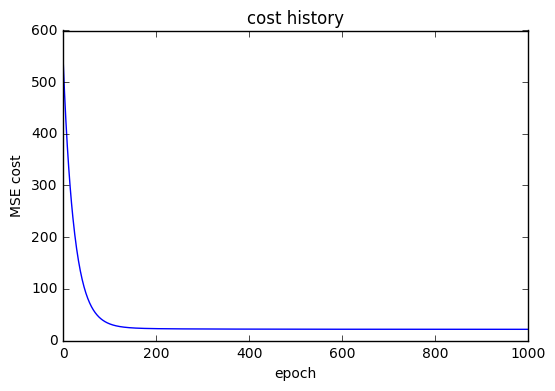

In [113]:
plt.plot(np.array(cost_history))
plt.title('cost history')
plt.xlabel('epoch')
plt.ylabel('MSE cost')
plt.show()

# MNIST - Logistic Regression

In [5]:
from tensorflow.examples.tutorials.mnist import input_data

DATA_PATH='/Volumes/RogerDrive/Developer/dataset/tensorflow_data/'
mnist = input_data.read_data_sets(DATA_PATH, one_hot=True)

Extracting /Volumes/RogerDrive/Developer/dataset/tensorflow_data/train-images-idx3-ubyte.gz
Extracting /Volumes/RogerDrive/Developer/dataset/tensorflow_data/train-labels-idx1-ubyte.gz
Extracting /Volumes/RogerDrive/Developer/dataset/tensorflow_data/t10k-images-idx3-ubyte.gz
Extracting /Volumes/RogerDrive/Developer/dataset/tensorflow_data/t10k-labels-idx1-ubyte.gz


In [39]:
learning_rate = 0.01
epochs = 5
batch_size = 100
nb_batch = mnist.train.num_examples // batch_size
display_step = 200
cost_history = list()

In [40]:
tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

w = tf.Variable(tf.truncated_normal([784, 10]))
b = tf.Variable(tf.truncated_normal([10]))

y = tf.matmul(x, w) + b

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
train_step = tf.train.AdamOptimizer(learning_rate).minimize(cost)

accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.arg_max(y_, 1), tf.arg_max(y, 1)), tf.float32))

In [45]:
with tf.Session() as sess:
    cost_history = list()
    tf.global_variables_initializer().run()
    
    for epoch in range(1, epochs + 1):
        for n_batch in range(1, nb_batch + 1):
            x_batch, y_batch = mnist.train.next_batch(batch_size)
            feed = {x: x_batch, y_: y_batch}
            _, loss = sess.run([train_step, cost], feed_dict=feed)
            cost_history.append(loss)
            if epoch * n_batch % display_step == 0:
                acc = accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels})
                print("epoch: {}, n_batch: {}, loss: {}, accuracy: {}".format(epoch, n_batch, loss, acc))

epoch: 1, n_batch: 200, loss: 0.900266706944, accuracy: 0.835600018501
epoch: 1, n_batch: 400, loss: 0.833678305149, accuracy: 0.871100008488
epoch: 2, n_batch: 100, loss: 0.375681221485, accuracy: 0.884100019932
epoch: 2, n_batch: 200, loss: 0.415938109159, accuracy: 0.887199997902
epoch: 2, n_batch: 300, loss: 0.188113898039, accuracy: 0.897300004959
epoch: 2, n_batch: 400, loss: 0.327655106783, accuracy: 0.897499978542
epoch: 2, n_batch: 500, loss: 0.544786393642, accuracy: 0.899399995804
epoch: 3, n_batch: 200, loss: 0.351921111345, accuracy: 0.900200009346
epoch: 3, n_batch: 400, loss: 0.295898258686, accuracy: 0.901799976826
epoch: 4, n_batch: 50, loss: 0.6140447855, accuracy: 0.910799980164
epoch: 4, n_batch: 100, loss: 0.310641884804, accuracy: 0.906199991703
epoch: 4, n_batch: 150, loss: 0.251638770103, accuracy: 0.904500007629
epoch: 4, n_batch: 200, loss: 0.440702170134, accuracy: 0.907199978828
epoch: 4, n_batch: 250, loss: 0.338205873966, accuracy: 0.91320002079
epoch: 4, 

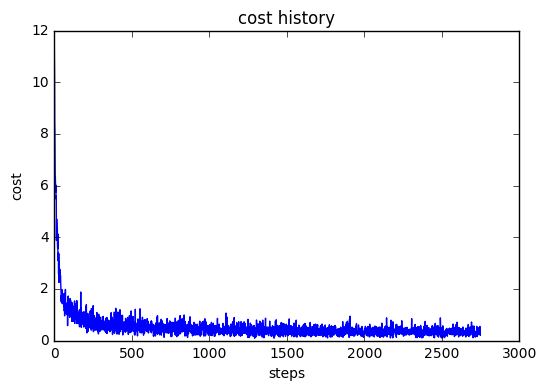

In [46]:
plt.plot(np.array(cost_history))
plt.title('cost history')
plt.xlabel('steps')
plt.ylabel('cost')
plt.show()

# MNIST - MLP

In [84]:
learning_rate = 0.01
epochs = 30
batch_size = 100
nb_batch = mnist.train.num_examples // batch_size
n_input_dim = 784
n_hidden_1 = 256
n_hidden_2 = 64
n_output_dim = 10

In [114]:
tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

xavier = tf.contrib.layers.xavier_initializer(uniform=True)

weights = {
    'w1': tf.Variable(tf.truncated_normal([n_input_dim, n_hidden_1]), dtype=tf.float32),
    'w2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2]), dtype=tf.float32),
    'w3': tf.Variable(tf.truncated_normal([n_hidden_2, n_output_dim]), dtype=tf.float32)
}

bias = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1]), dtype=tf.float32),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2]), dtype=tf.float32),
    'b3': tf.Variable(tf.truncated_normal([n_output_dim]), dtype=tf.float32)
}

In [115]:
with tf.name_scope('weights'):
    xa_weights = {
        'w1': tf.get_variable('w1', shape=[n_input_dim, n_hidden_1], initializer=xavier),
        'w2': tf.get_variable('w2', shape=[n_hidden_1, n_hidden_2], initializer=xavier),
        'w3': tf.get_variable('w3', shape=[n_hidden_2, n_output_dim], initializer=xavier)
    }

In [116]:
def multilayer_perceptron(x, weights, bias):
    layer1 = tf.nn.relu(tf.matmul(x, weights['w1']) + bias['b1'])
    layer2 = tf.nn.relu(tf.matmul(layer1, weights['w2']) + bias['b2'])
    logits = tf.matmul(layer2, weights['w3']) + bias['b3']
    return logits

y = multilayer_perceptron(x, xa_weights, bias)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
train_step = tf.train.AdamOptimizer(learning_rate).minimize(cost)
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.arg_max(y_, 1), tf.arg_max(y, 1)), tf.float32))

In [117]:
with tf.Session() as sess:
    cost_history = list()
    tf.global_variables_initializer().run()
    
    for epoch in range(1, epochs + 1):
        for n_batch in range(1, nb_batch + 1):
            x_batch, y_batch = mnist.train.next_batch(batch_size)
            feed = {x: x_batch, y_: y_batch}
            _, loss = sess.run([train_step, cost], feed_dict=feed)
            cost_history.append(loss)
            if epoch * n_batch % display_step == 0:
                acc = accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels})
                print("epoch: {}, n_batch: {}, loss: {}, accuracy: {}".format(epoch, n_batch, loss, acc))

epoch: 1, n_batch: 200, loss: 0.305585712194, accuracy: 0.938899993896
epoch: 1, n_batch: 400, loss: 0.183258712292, accuracy: 0.952400028706
epoch: 2, n_batch: 100, loss: 0.101205259562, accuracy: 0.956600010395
epoch: 2, n_batch: 200, loss: 0.0561177432537, accuracy: 0.954200029373
epoch: 2, n_batch: 300, loss: 0.182409241796, accuracy: 0.959999978542
epoch: 2, n_batch: 400, loss: 0.176004111767, accuracy: 0.957799971104
epoch: 2, n_batch: 500, loss: 0.0983705818653, accuracy: 0.962700009346
epoch: 3, n_batch: 200, loss: 0.144431069493, accuracy: 0.969500005245
epoch: 3, n_batch: 400, loss: 0.0812749192119, accuracy: 0.969699978828
epoch: 4, n_batch: 50, loss: 0.107174225152, accuracy: 0.963500022888
epoch: 4, n_batch: 100, loss: 0.0574964284897, accuracy: 0.968299984932
epoch: 4, n_batch: 150, loss: 0.0302390735596, accuracy: 0.966899991035
epoch: 4, n_batch: 200, loss: 0.139142498374, accuracy: 0.966899991035
epoch: 4, n_batch: 250, loss: 0.10975959897, accuracy: 0.968599975109
epo

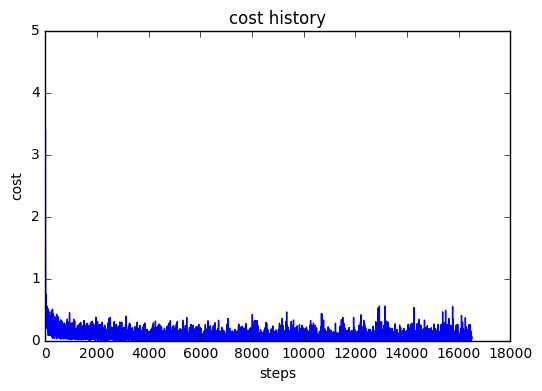

In [113]:
plt.plot(np.array(cost_history))
plt.title('cost history')
plt.ylim([0, 5])
plt.xlabel('steps')
plt.ylabel('cost')
plt.show()